# Telecom : Exam 2021

## Table of content <br>
* [Import](#Import)<br>
* [Utilities](#Utilities)<br>
* [Read](#Read)<br>
* [Data mining and cleaning](#DMC)<br>
    * [Overview](#Overview)<br>
    * [Data Cleaning](#DataCleaning)<br>
    * [Data Analyse](#DataAnalyse)<br>
    * [Data Visualisation](#Graphs)<br>
* [Data Modeling](#DataModeling)<br>
    * [Preprocessing](#Prepro)<br>
    * [Encodage](#Encodage)<br>
    * [Feature Selection](#FeatSelec)<br>
* [Testing and modeling](#TestsModels)
    * [KNN](#KNN)<br>
    * [Decision Tree](#DT)<br>
    * [Random Forest](#RF)<br>
* [Improvements](#Improvements)<br>
    * [Decision Tree hyperparameters improvement](#DTHI)<br>
    * [Random Forest hyperparameters improvement](#RFHI)<br>
* [Model performance according to the train set size](#ModelPerf)



## Import <a id ="Import"></a>

In this part we centralised all the stuff we need

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Utilities <a id="Utilities"></a>

In this part we centralised all the method we took from the lessons

In [155]:
def data_overview(df):
    print("####### Data overview #######")
    print("dataset")
    print("__________")
    print(df)
    print("head")
    print("_____")
    print()
    print(df.head(10))
    print()
    print("Rows - columns :" , df.shape)
    print("Number of features : ",df.shape[1]-1)
    print()
    print("Liste des colonnes : ")
    print("_____________________")
    print()
    print(df.columns)
    print()
    print("Liste des types : ")
    print("_____________________")
    print()
    print(df.info())
    print()
    print("Valeurs manquantes par colonne: ")
    print("________________________________")
    print()
    print(df.isnull().sum())
    print()
    print()
    print("Nombre total de valeurs manquantes: ")
    print("____________________________________")
    print()
    print(df.isnull().sum().values.sum())
    print()
    print("Nbre de valeurs différent es par colonne : ")
    print("__________________________________________")
    print()
    print(df.nunique())

In [156]:
def categorical_plots(df,categorical):
    import matplotlib.pyplot as plt
    i=0
    for i,cat_v in enumerate(categorical):
        plt.figure(figsize=(10,24))
        plt.subplots(1,1)
        df[cat_v].value_counts().plot(kind="bar", title=cat_v)
        plt.ylabel('Frequency')

In [157]:
def features_plots(df,numerical):
    import matplotlib.pyplot as plt
    for i,cv in enumerate(numerical):
        plt.figure(figsize=(10,24))
        plt.subplot(7,2,i+1)
        plt.hist(df[cv],bins=df[cv].nunique())
        plt.title(cv)
        plt.ylabel('frequency')
        plt.show()
    for i,cv in enumerate(numerical):
        plt.figure(figsize=(10,24))
        plt.subplot(7,2,i+3)
        plt.boxplot(df[cv])
        plt.title(cv)
        plt.ylabel('boxplot')
        plt.show()

In [158]:
def data_preprocessing(X,y,hot_encoder,binarizer,selector):
    X_categorical=X[ :,0:4]
    X_numerical=X[ :,4:6]
    
    X_categorical=hot_encoder.transform(X_categorical)
    X=np.hstack((X_categorical,X_numerical))
    Y=binarizer.transform(y)
    
    X=selector.transform(X)
    return X,Y

In [159]:
def binary_classifier_evaluation(title,x_test, y_test, y_pred, y_pred_proba,clf) : 
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    import matplotlib.pyplot as plt
    print("=======================")
    print(title)
    print("=======================")
    print()
    print()
    
    # confusion_matrix
    print("CONFUSION MATRIX : ")
    print()
    print(confusion_matrix(y_test, y_pred))
    print()
    print()
    
    
    # the accuracy of the model
    print("ACCURACY OF THE MODEL : ")
    print()
    print(clf.score(x_test, y_test))
    print()
    print()
    
    # classification report
    print("CLASSIFICATION REPORT : ")
    print()
    print(classification_report(y_test, y_pred))
    print()
    print()
    
    # score roc
    print("ROC-AUC SCORE : ")
    print()
    print(roc_auc_score(y_test, y_pred)) 
    print()
    print()
    
    # courbe roc
    print("ROC CURVE : ")
    print()
    y_pred_proba_1 = y_pred_proba[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_1)
    plt.plot(fpr, tpr, color='coral', lw=2)
    print("False positive rate", fpr)
    print("True negative rate", tpr)
    print("Thresholds", thresholds)
    

## Read <a id="Read"></a>

In this part we load the dataset file into the notebook

In [160]:
telecoms_train = pd.read_csv("churn-bigml-80.csv", delimiter=",")
telecoms_test = pd.read_csv("churn-bigml-20.csv", delimiter=",")

Here it's the five first rows

In [161]:
telecoms_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data mining and cleaning <a id="DMC"></a>

#### Overview <a id="Overview"></a>

In this part we visualise the dataset in details

In [162]:
data_overview(telecoms_train)

####### Data overview #######
dataset
__________
     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day

<AxesSubplot:>

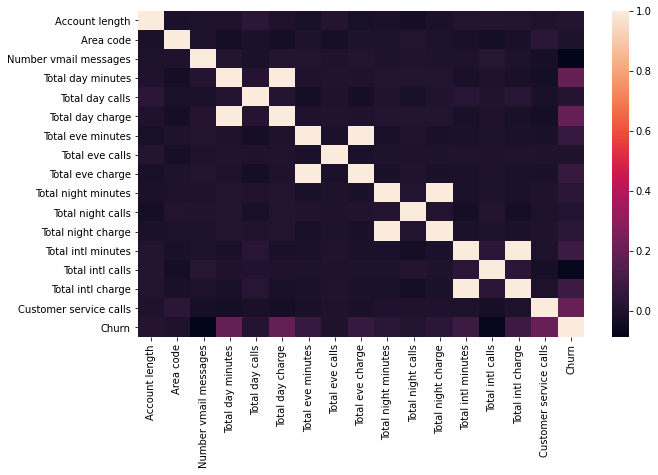

In [163]:
plt.figure(figsize=(10, 6))
sns.heatmap(telecoms_train.corr())

#### Data visualisation <a id="Graphs"></a>

On distingue dans un premier temps les valeurs catégorièlles des numériques

In [164]:
numerical_columns = ['Account length', 'Number vmail messages',
       'Total day calls', 'Total day charge', 
       'Total eve calls', 'Total eve charge', 
       'Total night calls', 'Total night charge',
       'Total intl calls', 'Total intl charge', 'Customer service calls',]
categorical_columns = ['State', 'Area code', 'International plan',
       'Voice mail plan']


On a les colonnes bien séparées

On utilise un pairplot qui va associé deux à deux chaque variable numérique. En orange et en blanc sont représenté respectivement les personnes qui partent et celles qui restent.
Si on regarde attentivement on se rend compte qu'une série de graphique sort du lot. Les graphiques concernant les 'Total day charge'.

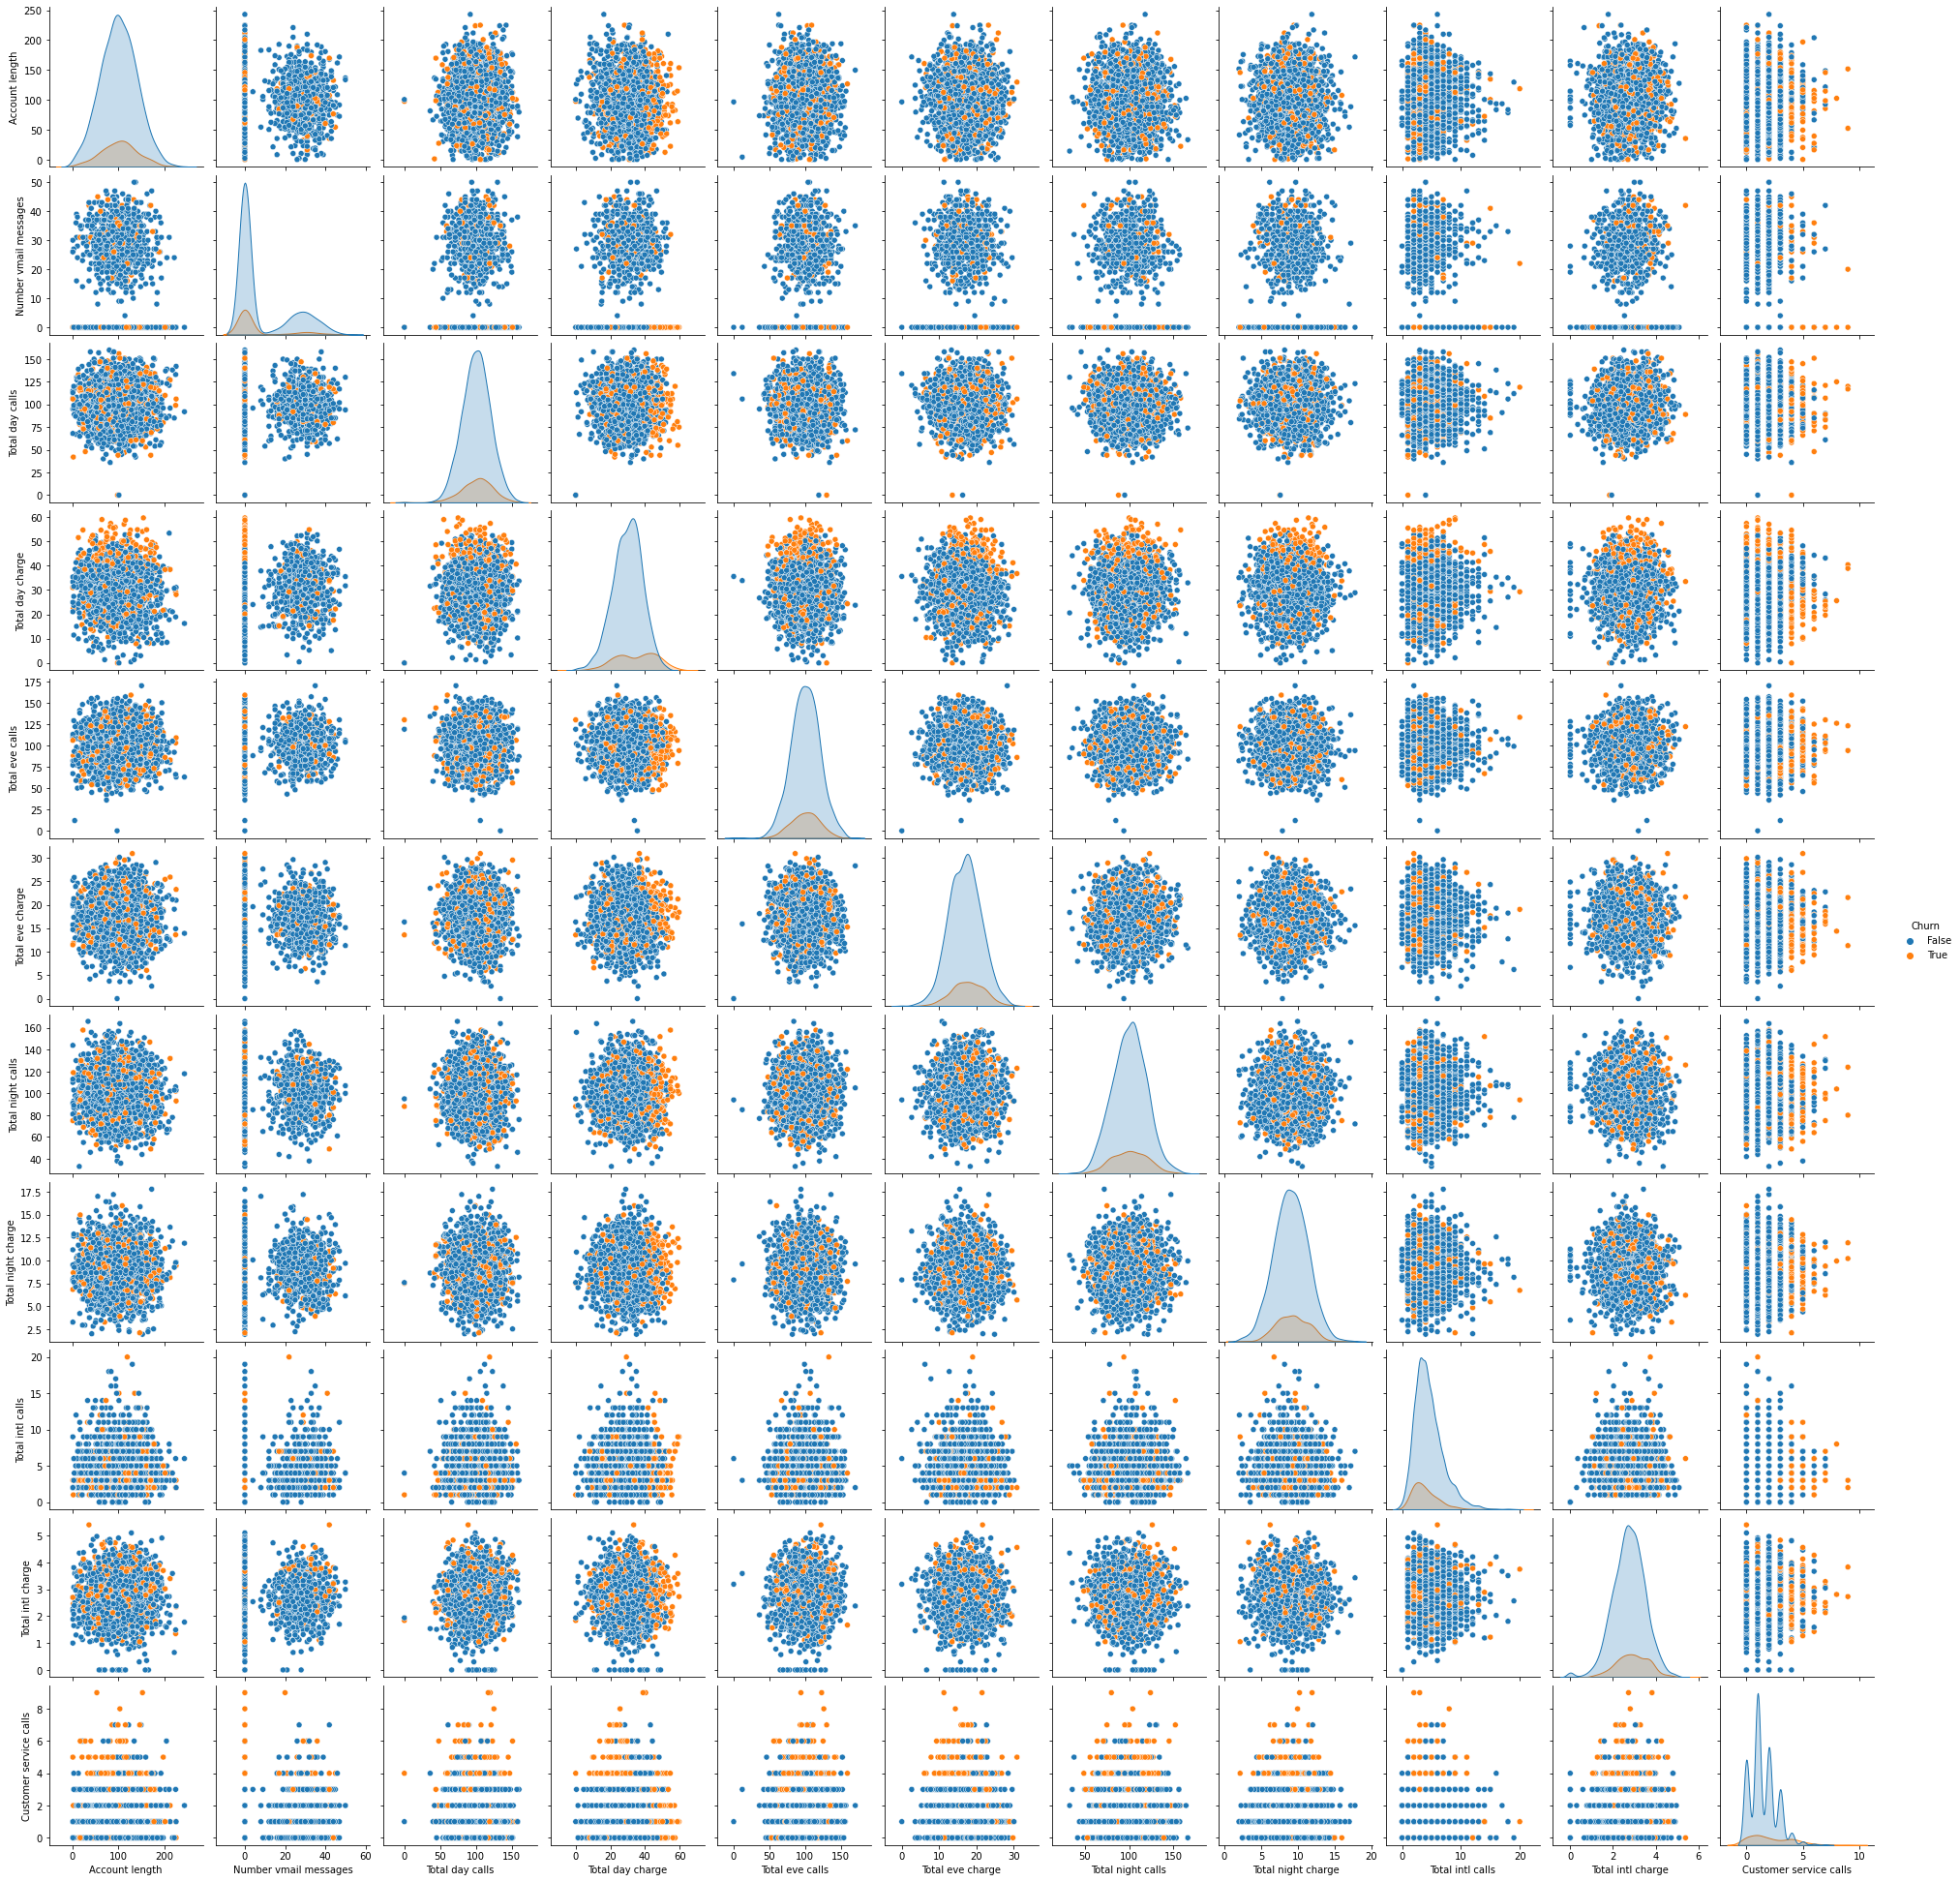

In [165]:
sns.pairplot(telecoms_train[numerical_columns + ['Churn']], hue = 'Churn')

Nous allons donc isoler la donnée 'Total day charge' pour la mettre en relation avec les données catégorielles, toujours en tenant compte de la target.

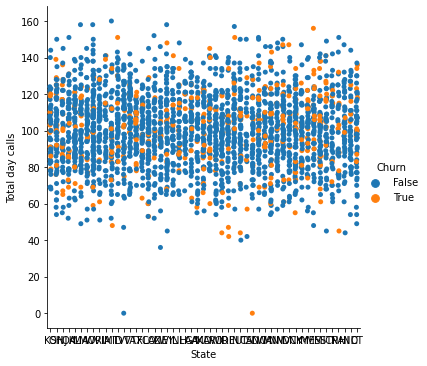

In [166]:
sns.catplot(x='State', y='Total day calls',data=telecoms_train, hue='Churn')

Ici pas de choses notables qui ressort.

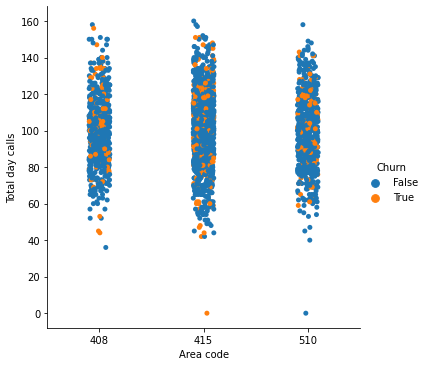

In [167]:
sns.catplot(x='Area code', y='Total day calls',data=telecoms_train, hue='Churn')

Ici non plus

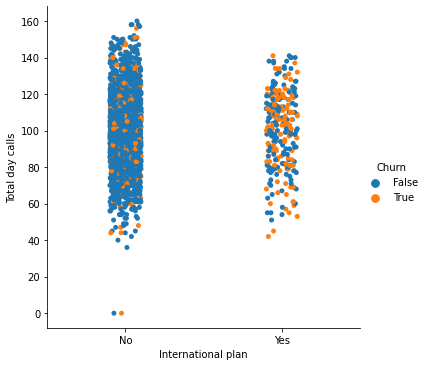

In [168]:
sns.catplot(x='International plan', y='Total day calls',data=telecoms_train, hue='Churn')

A partir d'ici on voit clairement une forte concentration des personnes sur le départ lorsqu'elle possède un plan international, quelque soit leur durée journalière d'appel.

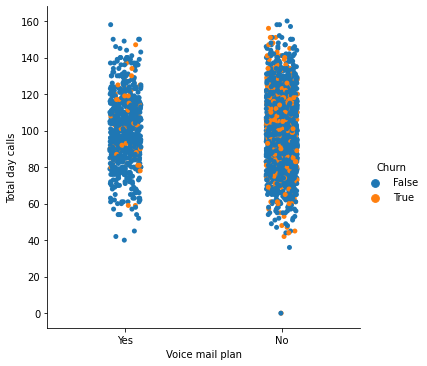

In [169]:
sns.catplot(x='Voice mail plan', y='Total day calls',data=telecoms_train, hue='Churn')

Ici aussi, bien que de manière moins marquée.

Une autre valeur numérique avec des tendances fort marquée est le 'Customer service calls'.

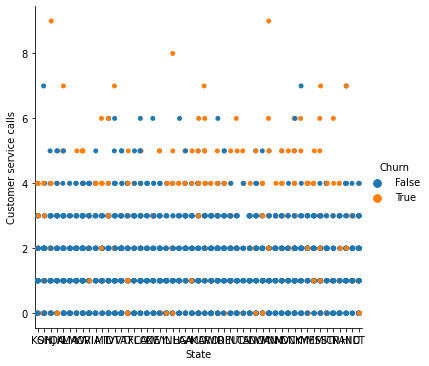

In [170]:
sns.catplot(x='State', y='Customer service calls',data=telecoms_train, hue='Churn')

On voit que quelque soit l'état, au plus un client fait d'appel au service client au plus il fait partie des personnes sur le départ.

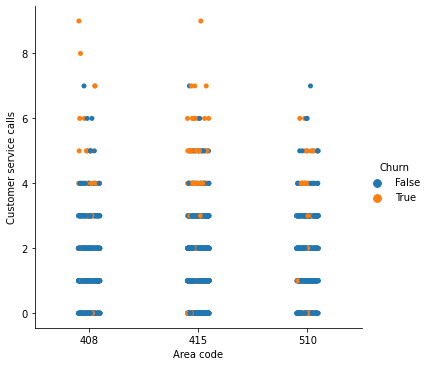

In [171]:
sns.catplot(x='Area code', y='Customer service calls',data=telecoms_train, hue='Churn')

De même ici en fonction de l''Area code'.

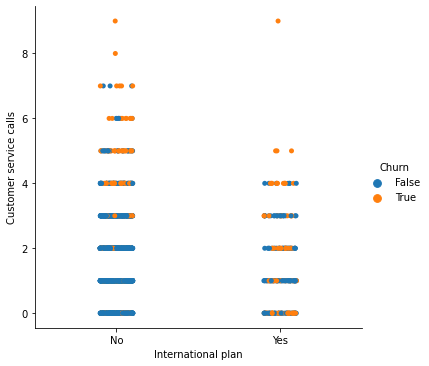

In [172]:
sns.catplot(x='International plan', y='Customer service calls',data=telecoms_train, hue='Churn')

Ici petite particularité, tout en ayant une même tendance que précédement. Les gens possédant un 'International plan' semblent bien moins enclin à la patience que ceux n'en possèdant pas.

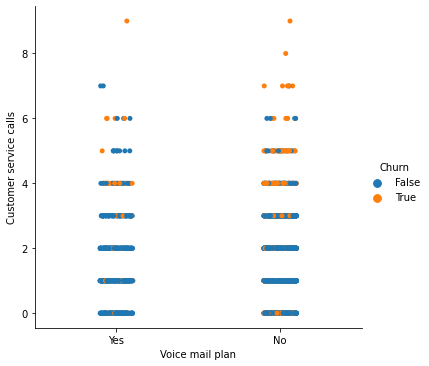

In [173]:
sns.catplot(x='Voice mail plan', y='Customer service calls',data=telecoms_train, hue='Churn')

Et ici on reste sur la même idée. Au plus le client appel le service client, au plus il est succeptible de nous quitter.

En conclusion, on peut dire qu'un client qui appel un nombre de fois élevé le service clientèle est d'autant plus succeptible de partir. Attention cette tendance est d'autant plus rapide si le client possède un 'International plan'.

#### Data Cleaning <a id="DataCleaning"></a>

On retire les colonnes des totaux des minutes car on a vu sur la Heatmap qu'ils sont fortement corélé avec les minutes.

In [174]:
non_essentials_data = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
telecoms_train = telecoms_train.drop(non_essentials_data, axis=1)
telecoms_test = telecoms_test.drop(non_essentials_data, axis=1)

## Data modeling <a id="DataModeling"></a>

### Preprocessing <a id="Prepro"></a>

In [175]:
X_train = telecoms_train.drop(["Churn"], axis=1)
y_train = telecoms_train["Churn"]

In [176]:
numerical_features = make_column_selector(dtype_include= np.number)
categorical_features = make_column_selector(dtype_exclude= np.number)

numerical_pipeline = make_pipeline(StandardScaler())
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprosseor = make_column_transformer((numerical_pipeline, numerical_features),(categorical_pipeline, categorical_features))


In [177]:
selector = SelectKBest()

## Testing and modeling <a id="TestsModels"></a>

In [178]:
clf_knn = KNeighborsClassifier()
param_grid_knn = {
    # 'selectkbest__k': range(0, X_train.shape[1]),
    # 'selectkbest__score_func': [chi2],
    'kneighborsclassifier__n_neighbors': range(1, 10),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__metric': ['minkowski', 'euclidean', 'manhattan'],

}
model_knn = make_pipeline(preprosseor,  clf_knn)
grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)


{'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
0.35591075591075594


In [179]:
best_model_knn = grid_search_knn.best_estimator_


In [180]:
clf_dt = DecisionTreeClassifier()
param_grid_dt = {
    # 'selectkbest__k': range(0, X_train.shape[1]),
    'selectkbest__k': range(0, 18),
    'selectkbest__score_func': [chi2],
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_depth': range(1, 10),
    'decisiontreeclassifier__min_samples_split': range(2, 5),
    'decisiontreeclassifier__min_samples_leaf': range(1, 5),
    'decisiontreeclassifier__max_features': ['auto'],
    'decisiontreeclassifier__random_state': [42],
}
preprosseor_dt = make_column_transformer((categorical_pipeline, categorical_features), remainder='passthrough')
model_dt = make_pipeline(preprosseor_dt, selector, clf_dt)
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring='recall', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)

{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 9, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 3, 'decisiontreeclassifier__random_state': 42, 'decisiontreeclassifier__splitter': 'best', 'selectkbest__k': 9, 'selectkbest__score_func': <function chi2 at 0x0000025842A184C0>}
0.615984015984016


D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.         0.         ... 0.2037962  0.23979354 0.18051948]
  warnings.warn(


In [181]:
best_model_dt = grid_search_dt.best_estimator_


In [182]:
clf_rf = RandomForestClassifier()
param_grid_rf = {
    # 'selectkbest__k': range(0, X_train.shape[1]),
    # 'selectkbest__score_func': [chi2],
    'randomforestclassifier__n_estimators': range(1, 10),
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_depth': range(1, 10),
    'randomforestclassifier__min_samples_split': range(2, 5),
    'randomforestclassifier__min_samples_leaf': range(1, 5),
    'randomforestclassifier__max_features': ['auto'],
    'randomforestclassifier__random_state': [42],
}
model_rf = make_pipeline(preprosseor,  clf_rf)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 6, 'randomforestclassifier__random_state': 42}
0.9107279128106752


In [183]:
best_model_rf = grid_search_rf.best_estimator_

In [184]:
X_test = telecoms_test.drop(["Churn"], axis=1)
y_test = telecoms_test["Churn"]
y_test = y_test

In [185]:
y_pred_knn = grid_search_knn.predict(X_test)
y_pred_dt = best_model_dt.predict(X_test)
y_pred_rf = best_model_rf.predict(X_test)

## Model performance according to the train set size <a id="ModelPerf"></a>

In [186]:
print("KNN:")
print(classification_report(y_test, y_pred_knn))

KNN:
              precision    recall  f1-score   support

       False       0.90      0.94      0.92       572
        True       0.49      0.36      0.41        95

    accuracy                           0.85       667
   macro avg       0.69      0.65      0.66       667
weighted avg       0.84      0.85      0.85       667



In [187]:
print("DT:")
print(classification_report(y_test, y_pred_dt))

DT:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94       572
        True       0.68      0.57      0.62        95

    accuracy                           0.90       667
   macro avg       0.81      0.76      0.78       667
weighted avg       0.90      0.90      0.90       667



In [188]:
print("RF:")
print(classification_report(y_test, y_pred_rf))

RF:
              precision    recall  f1-score   support

       False       0.91      0.99      0.95       572
        True       0.84      0.40      0.54        95

    accuracy                           0.90       667
   macro avg       0.88      0.69      0.74       667
weighted avg       0.90      0.90      0.89       667

